# Unbalanced Data

In [1]:
from google.colab import files
#files.upload()

In [2]:
import pandas as pd
census = pd.read_csv('census.csv')
census.head(5)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
import numpy as np
np.unique(census['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

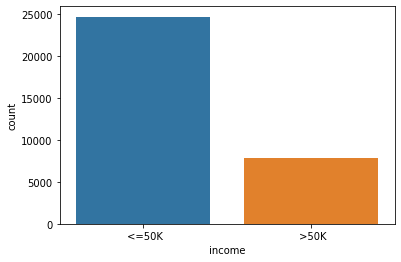

In [4]:
import seaborn as sns
sns.countplot(x = census['income']);

In [5]:
X_census = census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [6]:
y_census = census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

columns = [1,3,5,6,7,8,9,13]
for c in columns:
  encoder = LabelEncoder()
  X_census[:,c] = encoder.fit_transform(X_census[:,c])

In [8]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [9]:
len(X_census), len(y_census)

(32561, 32561)

# Subsampling 

In [30]:
from imblearn.under_sampling import TomekLinks

In [31]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_sample(X_census, y_census)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [32]:
X_under.shape, y_under.shape

((30160, 14), (30160,))

In [33]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [34]:
np.unique(y_under, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([22319,  7841]))

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])],remainder='passthrough')
X_under = onehotencorder.fit_transform(X_under).toarray()
X_under

array([[    0.,     0.,     0., ...,  2174.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    20.],
       [    0.,     0.,     0., ..., 15024.,     0.,    40.]])

In [36]:
X_census.shape, X_under.shape

((32561, 14), (30160, 108))

In [37]:
from sklearn.model_selection import train_test_split
X_tr_under, X_ts_under, y_tr_under, y_ts_under = train_test_split(X_under, y_under, test_size=0.15, random_state=0)
X_tr_under.shape, X_ts_under.shape

((25636, 108), (4524, 108))

In [38]:
# 84.70% with originals data
from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_census.fit(X_tr_under, y_tr_under)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
from sklearn.metrics import accuracy_score, classification_report
predicted = random_forest_census.predict(X_ts_under)
accuracy_score(y_ts_under, predicted)

0.8651635720601237

In [40]:
print(classification_report(y_ts_under, predicted))

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      3342
        >50K       0.79      0.66      0.72      1182

    accuracy                           0.87      4524
   macro avg       0.84      0.80      0.82      4524
weighted avg       0.86      0.87      0.86      4524



#Oversampling 

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
X_census.shape, y_census.shape

((32561, 14), (32561,))

In [43]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_sample(X_census, y_census)
X_over.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(49440, 14)

In [44]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [45]:
np.unique(y_over, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720, 24720]))

In [46]:
from sklearn.model_selection import train_test_split
X_tr_over, X_ts_over, y_tr_over, y_ts_over = train_test_split(X_over, y_over, test_size=0.15, random_state=0)
X_tr_over.shape, X_ts_over.shape

((42024, 14), (7416, 14))

In [47]:
from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_census.fit(X_tr_over, y_tr_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
from sklearn.metrics import accuracy_score, classification_report
predicted = random_forest_census.predict(X_ts_over)
accuracy_score(y_ts_over, predicted)

0.9110032362459547

In [49]:
print(classification_report(y_ts_over, predicted))

              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.91      3722
        >50K       0.93      0.89      0.91      3694

    accuracy                           0.91      7416
   macro avg       0.91      0.91      0.91      7416
weighted avg       0.91      0.91      0.91      7416

